In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
import scipy

### Parametric and Nonparametric Statistical Tests

There are parametric and nonparametric statistical tests.
* Depending on the normality of your data (meaning if it is a normal distribution or not), you may use a parametric test or a nonparametric test

  * If it is normally distributed, we use a parametric test.
  * If it is not, we use a nonparametric test

**In this unit, we will cover parametric tests**

### T-test

A t-test, also known as Student's t-test is a parametric test (the mean is the parameter) and can compute and test the difference between two sample means
* In other words, it tests if the difference in the means is 0
* Both samples should be normally distributed 
* It was developed by William Gosset of Guinness's Brewery
* The samples should be **independent (or unpaired)**. 
  * For example, imagine we are evaluating the effect of a new drug treatment, and we enrol 200 people, then randomise half in the treatment group and half in the control group. In this case, we have two independent groups

The null hypothesis states that there are no significant levels of difference between the samples. The alternative hypothesis states that there are significant levels of difference between the samples.

Let's consider a DataFrame that has Col1 and Col2 columns generated using a NumPy function to create normally distributed data

In [5]:
np.random.seed(123)
size = 250
df = pd.DataFrame(data={'Col1': np.random.normal(loc=7, scale=1, size=size),
                        "Col2": np.random.normal(loc=8, scale=1.2, size=size)}
                  )
df.head()

,Col1,Col2
0,5.914369,10.235513
1,7.997345,9.002070
2,7.282978,7.181059
3,5.493705,5.969537
4,6.421400,8.891223


We check normality using `pg.normality()`. They are normally distributed, so we can use a T-test to compare both.

In [8]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col1,0.997109,0.933506,True
Col2,0.997267,0.948801,True


Let's plot both variables in a histogram and box plot and ask ourselves: **are they similar or different**?

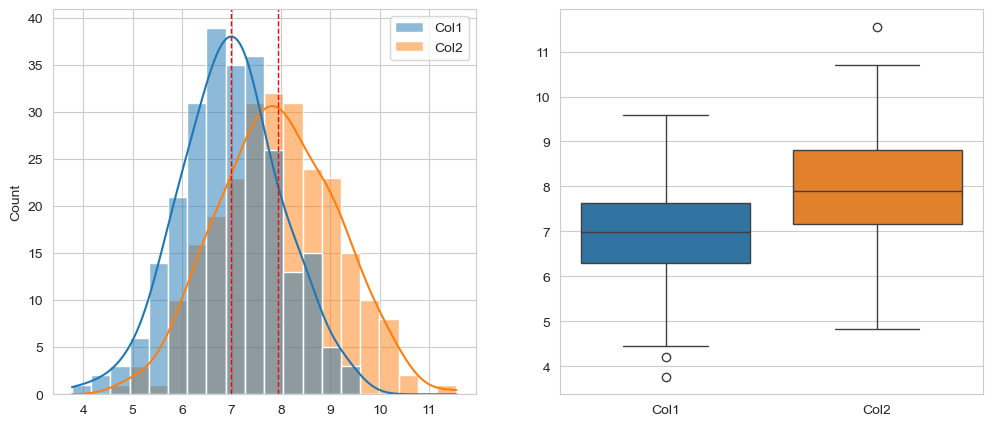

In [11]:
fig, axes = plt.subplots(nrows=1 ,ncols=2 ,figsize=(12,5))

sns.histplot(data=df, kde=True, ax=axes[0])
for col in df.columns: 
  axes[0].axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=1)
sns.boxplot(data=df, ax=axes[1])

plt.show()
print("\n\n")

We conduct a T-test using `pg.ttest()`. The documentation is found [here](https://pingouin-stats.org/build/html/index.html#t-test). We parse both numerical distributions in `x` and `y`
* We are interested in the p-value

In [14]:
pg.ttest(x=df['Col1'], y=df['Col2'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.619181,498,two-sided,3.327666e-20,"[-1.15, -0.76]",0.860366,1.2e+17,1.0


At this moment, we are interested in checking the `p-val`, which is the p-value. We get that using `.loc[]`

We consider our significant level alpha = 0.05. 
* Since p-value (3.32e-20) is smaller than the alpha, we reject the null hypothesis.

* Therefore there is a sufficient statistical difference between the X and Y levels. **Their levels are different!**
  * It isn't easy to make sense of the interpretation. The columns' names are Col1 and Col2. But consider them as maths exam scores from two distinct groups. Then, in this case, there is a difference between the groups scores, where the second group  has higher scores.

Let's consider another exercise and create a DataFrame that has Col3 and Col4 columns generated with a NumPy function to create normally distributed data

In [21]:
np.random.seed(3)
size = 250
df = pd.DataFrame(data={'Col3': np.random.normal(loc=7, scale=1, size=size),
                        "Col4": np.random.normal(loc=7.2, scale=1, size=size)})
df.head(3)

,Col3,Col4
0,8.788628,8.919477
1,7.436510,4.840785
2,7.096497,6.628651


We confirm normality with `pg.normality()`. They are normally distributed.

In [24]:
pg.normality(df, alpha=0.05)

,W,pval,normal
Col3,0.996040,0.779389,True
Col4,0.995926,0.759332,True


Let's plot both variables in a histogram and box plot and ask ourselves: are they similarly distributed or different?

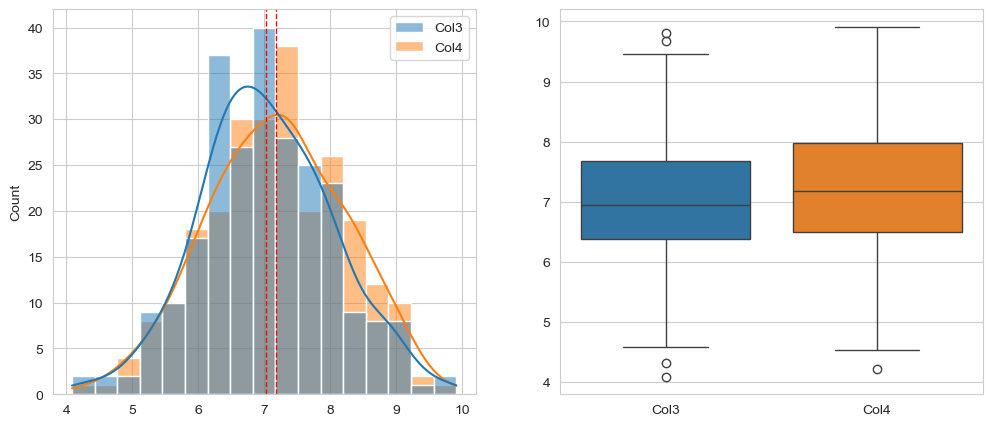

In [27]:
fig, axes = plt.subplots(nrows=1 ,ncols=2 ,figsize=(12,5))

sns.histplot(data=df, kde=True, ax=axes[0])
for col in df.columns: 
  axes[0].axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=1)
sns.boxplot(data=df, ax=axes[1])

plt.show()
print("\n\n")

We conduct a T-test using `pg.ttest()`.

In [30]:
pg.ttest(df['Col3'],df['Col4'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.672958,498,two-sided,0.094964,"[-0.33, 0.03]",0.149634,0.386,0.385961


And we extract the `p-val`, which is the p-value

In [33]:
pg.ttest(df['Col3'],df['Col4']).loc['T-test','p-val']

0.09496367925872773

We consider our significant level alpha = 0.05. 
* Since p-value (0.0949) is greater than the alpha, we accept the null hypothesis.

* Therefore there is not enough statistical difference between X and Y levels. Their levels are the same!

### Paired Student’s t-test

A Paired Student’s t-test is a parametric test (a mean, for example, could be the parameter) and tests for the difference between two sample paramter values. Both samples should be normally distributed.

* The samples should be **dependent (or paired)**
  * It should be a sample of matched pairs. 
  * For example, **imagine the same group is tested twice**. Say you want to examine the difference between people's scores on a test before and after a training intervention 

The null hypothesis states that there are no significant levels of difference between the samples. The alternative hypothesis states that there are significant levels of difference between the samples.

Consider a dataset from pingouin datasets. **It shows scores 
for a given test over time in different groups**.

* We are querying the Group Meditation only for this exercise.
* It shows Scores, the month (Time) and the person ID (subject)

In [38]:
df = (pg.read_dataset('mixed_anova')
    .query("Group == 'Meditation' and Time != 'January'")
    .drop(['Group'], axis=1)
    .reset_index(drop=True)
    )
print(df.shape)
df.head()

(60, 3)


,Scores,Time,Subject
0,5.579842,August,30
1,5.100035,August,31
2,4.472149,August,32
3,4.915282,August,33
4,6.316594,August,34


We will change `time` to an integer that represents the "month value" and assign it to the `Month` column

In [44]:
df['Month'] = df['Time'].replace({"August":8, "June":6})
df.sort_values(by='Month', ascending=True, inplace=True)
df.head()

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_17153/2328136249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Time'].replace({"August":8, "June":6})


,Scores,Time,Subject,Month
59,7.822986,June,59,6
31,7.196595,June,31,6
32,5.925979,June,32,6
33,6.343304,June,33,6
34,7.757797,June,34,6


Let's check if the `Scores` are normally distributed across `Month` with `pg.normality()`
* We see that levels for both months - 6 (June) and 8 (Aug) - are normally distributed

In [47]:
pg.normality(data=df, dv='Scores', group='Month', alpha=0.05)

,W,pval,normal
Month,,,
6,0.992021,0.997722,True
8,0.974791,0.676568,True


We use `pg.pairwise_ttests()` to conduct a Paired Student t-test. The arguments used are: 
* ``data`` 
* ``dv`` for the dependent variable (scores)
* ``within`` is the name of the column containing the within-subject factor (in this case, month)
* ``subject`` as the subject identifier (like the person ID)

We are interested in evaluating if the `Scores` levels are similar or different, considering the same group across `Month`

In [50]:
pg.pairwise_ttests(data=df, dv='Scores', within='Month', subject='Subject')

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Month,6,8,True,True,4.374791,29.0,two-sided,0.000143,187.445,1.0296


We are interested in p-value: `p-unc`

In [55]:
pg.pairwise_ttests(data=df, dv='Scores', within='Month', subject='Subject', effsize='cohen').loc[0,'p-unc']

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


0.0001434360522040144

We consider alpha = 0.05. 
* Since p-value (0.000143) is lower than the alpha, we reject the null hypothesis.
* Therefore there is enough statistical difference between scores in June and August. Their levels are not the same!

We use `pg.plot_paired()` to visualise this experiment. The function documentation is [here](https://pingouin-stats.org/build/html/index.html#paired-plot). The arguments are similar to the previous function (data, dv, within, subject), where dpi is the image quality we set at 150.
* It shows a boxplot indicating the distribution levels of Scores for months 6 and 8. 
* You will notice red and green dots and lines "travelling" from one month to another. Each dot in this experiment is a person that, in Month 6, had a given score and, in Month 8, had another score.
* If the line is red, the level decreases between months. If the line is green, the level increases. Have a look at the plot, and check visually if, in general, there are more greens or reds and if they are changing a lot or not.
* The test assesses if the levels for the group as a whole increased or not.

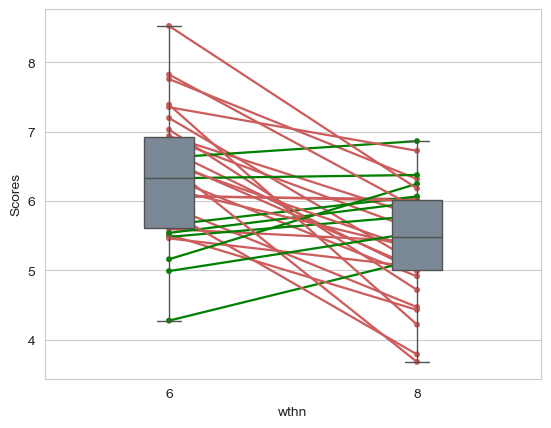

In [60]:
pg.plot_paired(data=df, dv='Scores', within='Month', subject='Subject')
plt.show()

However, in more realistic applications you may have more "Months" to analyse. 
* For example, the previous experiment may have been conducted over more months

 Consider the same dataset in the previous example, but now we will consider three months
* We will change time to an integer that represents the "month value" and assign it to the `Month` column

In [63]:
df = (pg.read_dataset('mixed_anova')
    .query("Group == 'Meditation'")
    .drop(['Group'], axis=1)
    )

df['Month'] = df['Time'].replace({"January":1, "June":6, "August":8})
df.sort_values(by='Month', ascending=True, inplace=True)

df.head()

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_17153/1034144244.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Time'].replace({"January":1, "June":6, "August":8})


,Scores,Time,Subject,Month
134,6.439633,January,44,1
121,5.182293,January,31,1
122,5.117116,January,32,1
123,6.236258,January,33,1
124,4.096987,January,34,1


Let's check if the `Scores` are normally distributed across `Month` with `pg.normality()`
* The score in each month is normally distributed

In [66]:
pg.normality(data=df, dv='Scores', group='Month', alpha=0.05)

,W,pval,normal
Month,,,
1,0.978803,0.792915,True
6,0.992021,0.997722,True
8,0.974791,0.676568,True


We use `pg.pairwise_ttests()` to conduct a pairwise Paired Student t-test. We are interested in evaluating if `Scores` levels are similar or different, considering the same group of people across `Month`
* We will conduct three tests, each with a given pair of months. That is why it is called pairwise. We will be interested in column ``p-unc``
* In the end we will know if there are different levels of scores, individually, from:
  * January to June,
  * June to August and 
  * January to August

In [69]:
pg.pairwise_ttests(data=df, dv='Scores', within='Month', subject='Subject', effsize='cohen')

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Month,1,6,True,True,-1.438842,29.0,two-sided,0.160902,0.492,-0.372253
1,Month,1,8,True,True,2.022993,29.0,two-sided,0.052379,1.153,0.564895
2,Month,6,8,True,True,4.374791,29.0,two-sided,0.000143,187.445,1.043147


We consider alpha = 0.05. 

* From January (Month 1) to June (Month 6), p-value (0.160902) is greater than the alpha; we accept the null hypothesis. Therefore there is **not** enough statistical difference between scores in **January and June.** Their levels are the same!

* From June (Month 6) to August (Month 8), p-value (0.00014) is lower than the alpha; we reject the null hypothesis. Therefore there is enough statistical **difference between scores in June and August**. Their levels are not the same!

* From January (Month 1) to August (Month 8), p-value (0.052379) is a bit greater than the alpha; we accept the null hypothesis. Therefore there is **not** enough statistical difference between scores in **January and August**. Their levels are the same!

We use `pg.plot_paired()` to visualise this experiment
* In the end, imagine the experiment was done using three different months. There was not enough statistical difference over time in the group when you compare Jan and Aug
* However, visually there was an apparent increase from Jan to Jun, but that was not significant enough.
* At the same time, if you compare the levels from Jun to Aug, there was a statistically significant decrease.

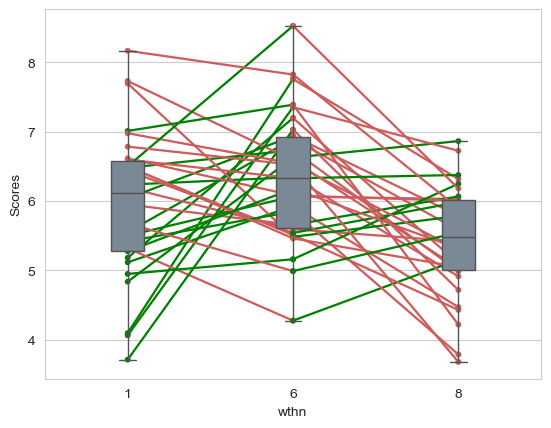

In [75]:
pg.plot_paired(data=df, dv='Scores', within='Month', subject='Subject')
plt.show()

### Analysis of Variance (ANOVA)

An Analysis of Variance or ANOVA test is parametric that compares mean "variation" between three or more groups. The data should be normally distributed

Consider a dataset from pingouin datasets. It shows `Pain threshold` levels across different people, `Hair color` (Dark Brunette, Light Blond, Dark Blond, Light Brunette). The subject is the person's ID

In [78]:
df = pg.read_dataset('anova')
print(df.shape)
df.head(3)

(19, 3)


,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71


We can check `Pain threshold` normality across different `Hair color`. It is normally distributed

We combine a boxplot and swarm plot to visually check `Pain threshold` across different `Hair color`
* **Visually speaking**, we notice few data points. And it looks like to have a `Pain threshold` difference across different `Hair color`. However, it is **wise** not to conclude anything before conducting a statistical test.

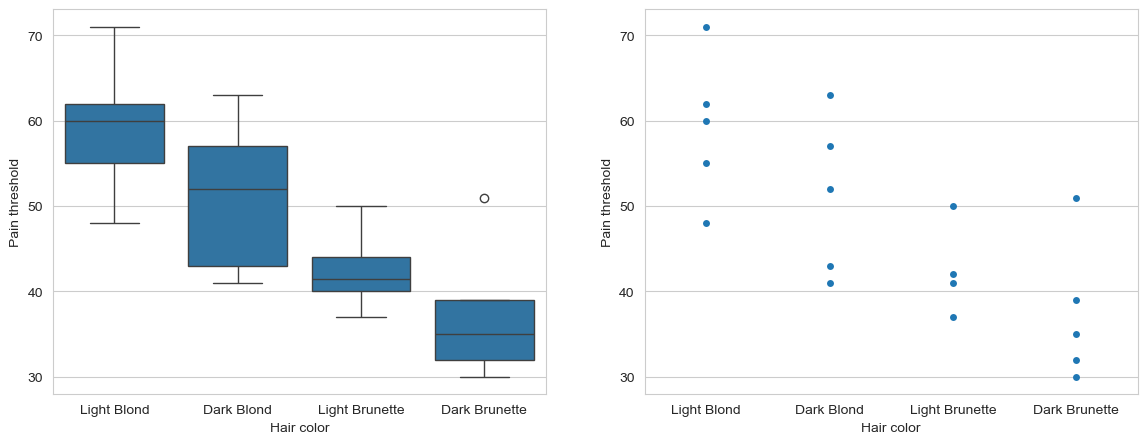

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.boxplot(data=df,x="Hair color", y="Pain threshold", ax=axes[0])
sns.swarmplot(data=df,x="Hair color", y="Pain threshold", dodge=True, ax=axes[1])
plt.show()

We conduct an ANOVA test with `pg.anova()`. The function documentation is found [here](https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova)

In [87]:
pg.anova(data=df, dv='Pain threshold', between='Hair color', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


We are interested in p-unc, which is 0.004114	
* We consider our significant level alpha = 0.05. 
* Since p-value (0.004114) is lower than the alpha, we reject the null hypothesis.

* Therefore there is enough statistical difference to conclude that Pain threshold levels are different between different hair colour